# Prep

In [1]:
import os, time, json

os.environ["CUDA_VISIBLE_DEVICES"]="5"

In [2]:
! pip install scikit-learn
! pip install pyyaml h5py
! pip install seqeval==0.0.5
! pip install tensorflow==1.14.0
! pip install keras==2.2.4
! pip install seqeval tabulate

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
! pip install pandas

You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
# Installing extra-dependencies
! pip -q install git+https://www.github.com/keras-team/keras-contrib.git sklearn-crfsuite

import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

You should consider upgrading via the 'pip install --upgrade pip' command.


Using TensorFlow backend.


In [5]:
EPOCHS = 16  # Number of passes through entire dataset
BATCH_SIZE = 8  # Number of examples used in each iteration
EMBEDDING = 100  # Dimension of word embedding vector
MAX_LEN = 128  # Max length of review (in words)
STRIDE = 0

ADJ_LEN = MAX_LEN - STRIDE

In [6]:
def process_input(filename):
  tokens = []
  tags = []

  with open(filename, 'r', encoding="utf8") as f:
    i = 0
    for line in f:
      data = json.loads(line)
      n_sentence = math.ceil(len(data['text'])/ADJ_LEN)
      tokens.append([data['text'][x*ADJ_LEN-STRIDE:ADJ_LEN*(x+1)] for x in range(n_sentence)])
      tags.append([data['text-tags'][x*ADJ_LEN-STRIDE:ADJ_LEN*(x+1)] for x in range(n_sentence)])
      i += 1
  return tokens, tags

In [7]:
def process_data(filename):
    tokens, tags = process_input(filename)
    output = []
    m_sentence = 0
    for doc_ids in range(len(tokens)):
        first_doc = True
        for sentence_ids in range(len(tokens[doc_ids])):
            first_sentence = True
            for word_ids in range(len(tokens[doc_ids][sentence_ids])):
                if first_doc:
                    doc = doc_ids
                    first_doc = False
                else:
                    doc = None
                if first_sentence:
                    sentence = m_sentence
                    m_sentence += 1
                    first_sentence = False
                else:
                    sentence = None
                output.append((doc, sentence, tokens[doc_ids][sentence_ids][word_ids], tags[doc_ids][sentence_ids][word_ids]))
    
    res = list(zip(*output))
    return pd.DataFrame({'doc': res[0], 'sentence': res[1], 'word': res[2], 'tag': res[3]})

In [8]:
tokens, tags = process_input('data/out.val.jsonl')
len(tokens[-1][0])

128

In [9]:
plt.style.use("ggplot")
#dataset_baru_noline_all_O_tag
data = process_data('data/out.train.jsonl')
data['word'] = data['word'].str.lower()
data['word'] = data['word'].str.encode('ascii', 'ignore').str.decode('ascii')
data['word'] = data['word'].replace(to_replace ='\d+', value = '<\g<0>>', regex = True).replace(to_replace ='[0-9]', value = 'X', regex = True)
data = data.fillna(method="ffill")

In [10]:
# data[25:32]

In [11]:
# data.groupby('tag')['doc'].nunique()

In [12]:
# data.groupby('tag')['doc'].nunique()
# data.groupby(['tag','doc']).size().reset_index()


temp = data.groupby(['tag','doc']).size().sort_values(ascending=False).reset_index()
temp.groupby('tag', group_keys=False).apply(lambda x: x.sort_values(0, ascending=False)).groupby('tag').head(2)


,tag,doc,0
3966,B-Jenis Amar,167.0,6
12855,B-Jenis Amar,549.0,2
4630,B-Jenis Dakwaan,159.0,5
12917,B-Jenis Dakwaan,200.0,2
8745,B-Jenis Perkara,217.0,2
10664,B-Jenis Perkara,396.0,2
3491,B-Melanggar UU (Dakwaan),167.0,7
4284,B-Melanggar UU (Dakwaan),203.0,5
6352,B-Melanggar UU (Pertimbangan Hukum),332.0,4
6358,B-Melanggar UU (Pertimbangan Hukum),349.0,4


In [13]:
data.groupby('tag').count()

,doc,sentence,word
tag,,,
B-Jenis Amar,682,682,682
B-Jenis Dakwaan,594,594,594
B-Jenis Perkara,652,652,652
B-Melanggar UU (Dakwaan),945,945,945
B-Melanggar UU (Pertimbangan Hukum),913,913,913
B-Melanggar UU (Tuntutan),656,656,656
B-Nama Hakim Anggota,1321,1321,1321
B-Nama Hakim Ketua,680,680,680
B-Nama Jaksa,672,672,672


In [14]:
words = list(set(data["word"].values))
words.append("ENDPAD")
n_words = len(words); n_words

79534

In [15]:
tags = list(set(data["tag"].values))
n_tags = len(tags); n_tags

41

In [16]:
import re
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["word"].values.tolist(),
                                                           s["tag"].values.tolist())]
        self.grouped = self.data.groupby("sentence").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped[self.n_sent]
            self.n_sent += 1
            return s
        except:
            return None

    def get_sentence_except_all_O_tags(self):
        temp_sentence = []
        for s in self.sentences:
            count_O_tag = len([t for w, t in s if t=="O"])
            count_token = len(s)
            # print(count_token, count_O_tag)
            if count_token > count_O_tag:
                # print("masuk")
                temp_sentence.append(s)
        return temp_sentence
    
    def remove_puctuation(self):
        temp_sentence = []
        for s in self.sentences:
            temp_s = [[w,t] for w,t in s if not re.match('^[!"#$%&\'()*+, -./:;<=>?@[\]^_`{|}~ ]+$', w)]
            temp_sentence.append(temp_s)
        return temp_sentence

In [17]:
getter = SentenceGetter(data)
# sentences = getter.remove_puctuation()
sentences = getter.get_sentence_except_all_O_tags()

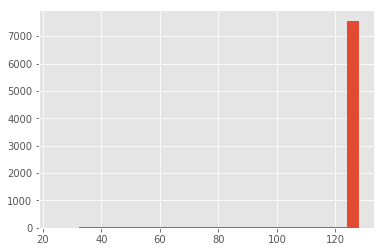

In [18]:
plt.style.use("ggplot")

plt.hist([len(s) for s in sentences], bins=25)
plt.show()

In [19]:
print(len(sentences[0]))

128


In [20]:
# Vocabulary Key:word -> Value:token_index
# The first 2 entries are reserved for PAD and UNK
# word2idx = {w: i + 2 for i, w in enumerate(vocab)}
word2idx = {k: v + 2 for (k, v) in zip(words, range(len(words)))}
word2idx["UNK"] = 1 # Unknown words
word2idx["PAD"] = 0 # Padding
n_words = len(word2idx)

# Vocabulary Key:token_index -> Value:word
idx2word = {i: w for w, i in word2idx.items()}

# Vocabulary Key:Label/Tag -> Value:tag_index
# The first entry is reserved for PAD
tag2idx = {t: i+1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0

# Vocabulary Key:tag_index -> Value:Label/Tag
idx2tag = {i: w for w, i in tag2idx.items()}

In [21]:
from keras.preprocessing.sequence import pad_sequences
# Convert each sentence from list of Token to list of word_index
X = [[word2idx[w[0]] for w in s] for s in sentences]
# Padding each sentence to have the same lenght
X = pad_sequences(maxlen=MAX_LEN, sequences=X, padding="post", value=word2idx["PAD"])

# Convert Tag/Label to tag_index
y = [[tag2idx[w[1]] for w in s] for s in sentences]
# Padding each sentence to have the same lenght
y = pad_sequences(maxlen=MAX_LEN, sequences=y, padding="post", value=tag2idx["PAD"])

from keras.utils import to_categorical
# One-Hot encode
y = [to_categorical(i, num_classes=n_tags+1) for i in y]

from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1, shuffle=False)
X_tr.shape, X_te.shape, np.array(y_tr).shape, np.array(y_te).shape

((7208, 128), (801, 128), (7208, 128, 42), (801, 128, 42))

# **Persiapan Data SVM**

In [22]:
# X = [[w[0] for w in s] for s in sentences]
# y = [[w[1] for w in s] for s in sentences]

# from sklearn.model_selection import train_test_split
# X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1, shuffle=False)

In [23]:
# y_tr[0][0]

In [24]:
# import csv

# # init_daftar_kata_penting()
# fields = ['sentence', 'word', 'tag', 'is_train']
# # writing to csv file

# with open(local_download_path+'dataset_baru_svm.csv', 'w') as csvfile:
#   # creating a csv writer object
#   csvwriter = csv.writer(csvfile)
#   # writing the fields
#   csvwriter.writerow(fields)

#   for i in range(len(X_tr)):
#     sen_n = 'sentence: {:07d}'.format(i+1)
#     for j in range(len(X_tr[i])):
#       csvwriter.writerow([sen_n, X_tr[i][j], y_tr[i][j], 1])


#   for i in range(len(X_te)):
#     sen_n = 'sentence: {:07d}'.format(len(X_tr)+i+1)
#     for j in range(len(X_te[i])):
#       csvwriter.writerow([sen_n, X_te[i][j], y_te[i][j], 0])

In [25]:
# print("The word indonesia is identified by the index: {}".format(word2idx["indonesia"]))
# print("The labels B_tanggal is identified by the index: {}".format(tag2idx["B_tanggal"]))
# i=2
# print('Raw Sample  : ', ' '.join([w for w, t in getter.sentences[i]]))
# print('Text2vec    : ', ' '.join(['{}'.format(word2idx[w]) for w, t in getter.sentences[i]]))
# print('Text2vec PAD: ', ' '.join(['{}'.format(w) for w in X[i]]))
# print('Raw Label   : ', ' '.join([t for w, t in getter.sentences[i]]))
# print('Tag2vec     : ', ' '.join(['{}'.format(tag2idx[t]) for w, t in getter.sentences[i]]))

# **Bi LSTM**

In [26]:
IS_Bidirect = True
IS_CRF = False

In [27]:
from keras import Model
from keras import optimizers
from keras.layers import Input, LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, SpatialDropout1D
from keras_contrib.layers import CRF
from keras_contrib.losses import crf_loss
from keras_contrib.metrics import crf_accuracy, crf_viterbi_accuracy

input = Input(shape=(MAX_LEN,))
model = Embedding(input_dim=n_words, output_dim=EMBEDDING, input_length=MAX_LEN)(input)
model = Dropout(0.1)(model)

if IS_Bidirect:
    model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
else:
    model = LSTM(units=100, return_sequences=True, recurrent_dropout=0.1)(model)

if IS_CRF:
    crf = CRF(n_tags+1)  # CRF layer, n_tags+1(PAD)
    out = crf(model)  # output
else:
    out = TimeDistributed(Dense(n_tags+1, activation="softmax"))(model)  # softmax output layer
    
model = Model(input, out)

if IS_CRF:
    model.compile(optimizer="rmsprop", loss=crf_loss, metrics=[crf_viterbi_accuracy])
else:
    model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

W0618 16:46:52.550725 139828937434944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 16:46:52.567617 139828937434944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 16:46:52.570765 139828937434944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0618 16:46:52.579684 139828937434944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0618 16:46:52.585413 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 128, 100)          7953600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 100)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128, 200)          160800    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 128, 42)           8442      
Total params: 8,122,842
Trainable params: 8,122,842
Non-trainable params: 0
_________________________________________________________________


In [28]:
print("start\n")
start = time.time()

history = model.fit(X_tr,
                    np.array(y_tr),
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1)

#elapsed
end = time.time()
elapsed = end - start
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed))
print("Elapsed time {}".format(elapsed_time))

W0618 16:46:53.377442 139828937434944 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


start

Train on 6487 samples, validate on 721 samples
Epoch 1/16
6487/6487 [==============================] - 224s 35ms/step - loss: 0.3155 - acc: 0.9327 - val_loss: 0.1007 - val_acc: 0.9714
Epoch 2/16
6487/6487 [==============================] - 185s 28ms/step - loss: 0.0841 - acc: 0.9749 - val_loss: 0.0596 - val_acc: 0.9831
Epoch 3/16
6487/6487 [==============================] - 186s 29ms/step - loss: 0.0520 - acc: 0.9843 - val_loss: 0.0407 - val_acc: 0.9888
Epoch 4/16
6487/6487 [==============================] - 180s 28ms/step - loss: 0.0388 - acc: 0.9885 - val_loss: 0.0346 - val_acc: 0.9907
Epoch 5/16
6487/6487 [==============================] - 181s 28ms/step - loss: 0.0318 - acc: 0.9905 - val_loss: 0.0324 - val_acc: 0.9914
Epoch 6/16
6487/6487 [==============================] - 177s 27ms/step - loss: 0.0270 - acc: 0.9920 - val_loss: 0.0336 - val_acc: 0.9905
Epoch 7/16
6487/6487 [==============================] - 171s 26ms/step - loss: 0.0245 - acc: 0.9929 - val_loss: 0.0292 - val

In [29]:
model.save('exp1.h5')

In [30]:
# Evaluation
eve = model.predict(X_te)

y_pred = np.argmax(eve, axis=-1)
y_test_true = np.argmax(y_te, -1)

# Convert the index to tag
y_pred = [[idx2tag[i] for i in row] for row in y_pred]
y_test_true = [[idx2tag[i] for i in row] for row in y_test_true]

y_pred = np.array(y_pred).flatten()
y_true = np.array(y_test_true).flatten()

# from sklearn_crfsuite.metrics import flat_classification_report
# report = flat_classification_report(y_pred=y_pred, y_true=y_test_true)
# print(report)

from sklearn.metrics import classification_report
report = classification_report(y_pred, y_true)
print(report)


                                     precision    recall  f1-score   support

                       B-Jenis Amar       0.93      1.00      0.97        56
                    B-Jenis Dakwaan       0.85      1.00      0.92        41
                    B-Jenis Perkara       0.85      0.96      0.90        48
           B-Melanggar UU (Dakwaan)       0.94      0.93      0.93        82
B-Melanggar UU (Pertimbangan Hukum)       0.97      0.81      0.88        77
          B-Melanggar UU (Tuntutan)       1.00      0.93      0.96        59
               B-Nama Hakim Anggota       0.97      0.96      0.96       117
                 B-Nama Hakim Ketua       0.95      0.97      0.96        60
                       B-Nama Jaksa       0.92      0.90      0.91        60
                    B-Nama Panitera       0.92      0.95      0.94        61
                   B-Nama Pengacara       0.90      0.84      0.87        32
                  B-Nama Pengadilan       0.98      0.95      0.97        6

In [31]:
from seqeval.metrics import classification_report as seq_cr

print(seq_cr(y_pred.tolist(), y_true.tolist(), digits=4))

                                   precision    recall  f1-score   support

           Melanggar UU (Dakwaan)     0.8889    0.8182    0.8521        88
          Melanggar UU (Tuntutan)     0.9636    0.8281    0.8908        64
                  Tanggal Putusan     0.9016    0.9016    0.9016        61
                 Tanggal Kejadian     0.7739    0.7672    0.7706       116
                    Nomor Putusan     0.9500    0.9500    0.9500        60
                  Putusan Hukuman     0.9000    0.8571    0.8780        63
Melanggar UU (Pertimbangan Hukum)     0.8750    0.6364    0.7368        88
                    Jenis Dakwaan     0.8333    0.8889    0.8602        45
                    Nama Terdakwa     0.9324    0.9079    0.9200        76
                       Nama Saksi     0.8964    0.8343    0.8643       332
                       Nama Jaksa     0.8305    0.7424    0.7840        66
                    Tingkat Kasus     0.9825    0.9825    0.9825        57
                    Jeni

In [32]:
y_pred_df_mix = pd.Series(y_pred, name="Predicted")
y_true_df_mix = pd.Series(y_true, name="Reference")
df_confusion_mix = pd.crosstab(y_true_df_mix, y_pred_df_mix)

In [33]:
df_confusion_mix

Predicted,B-Jenis Amar,B-Jenis Dakwaan,B-Jenis Perkara,B-Melanggar UU (Dakwaan),B-Melanggar UU (Pertimbangan Hukum),B-Melanggar UU (Tuntutan),B-Nama Hakim Anggota,B-Nama Hakim Ketua,B-Nama Jaksa,B-Nama Panitera,...,I-Nama Saksi,I-Nama Terdakwa,I-Nomor Putusan,I-Putusan Hukuman,I-Tanggal Kejadian,I-Tanggal Putusan,I-Tingkat Kasus,I-Tuntutan Hukuman,O,PAD
Reference,,,,,,,,,,,,,,,,,,,,,
B-Jenis Amar,56,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
B-Jenis Dakwaan,0,41,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,0
B-Jenis Perkara,0,0,46,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
B-Melanggar UU (Dakwaan),0,0,0,76,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
B-Melanggar UU (Pertimbangan Hukum),0,0,0,0,62,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B-Melanggar UU (Tuntutan),0,0,0,0,0,55,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B-Nama Hakim Anggota,0,0,0,0,0,0,112,0,0,0,...,0,0,0,0,0,0,0,0,2,0
B-Nama Hakim Ketua,0,0,0,0,0,0,0,58,0,0,...,0,0,0,0,0,0,0,0,1,0
B-Nama Jaksa,0,0,0,0,0,0,0,0,54,0,...,0,0,0,0,0,0,0,0,2,0


In [34]:
df_confusion_mix.to_csv(f'BiLSTM1-confusion_mat.csv')

In [35]:
apakek = model.predict(X_te)
apakek = np.argmax(apakek, axis=-1)
apakek2 = np.argmax(y_te, axis=-1)

In [36]:
# Convert the index to tag
y_pred2 = [[idx2tag[i] for i in row] for row in apakek]
y_test_true2 = [[idx2tag[i] for i in row] for row in apakek2]

idx2word = {}
for x, y in word2idx.items():
    idx2word[y] = x
text = [[idx2word[i] for i in row] for row in X_te]

In [47]:
" ".join(text[744])

'dan <X> (satu) buah cakram depan, yang kemudian dijadikan barang bukti dipersidangan ; - bahwa benar barang bukti berupa gergaji besi warna hijau kuning tersebut, milik terdakwa yang dipergunakan untuk memotong dan melepas onderdil sepeda motor milik saksi sarino ; menimbang bahwa, setelah majelis hakim menyatakan pemeriksaan perkara selesai, selanjutnya penuntut umum telah mengajukan tuntutan pidananya tertanggal <XX> agustus <XXXX>, yang pada pokoknya agar majelis hakim yang memeriksa dan mengadili perkara ini memutuskan sebagai berikut : <X> menyatakan terdakwa sunarjo bin paikun, bersalah melakukan tindak pidana "menyewa, menukar, menerima gadai, menerima hadiah, atau untuk menarik keuntungan, menjual, menyewakan, menukarkan, menggadaikan, mengangkut, menyimpan atau menyembunyikan suatu benda, yang diketahui atau sepatutnya harus diduga bahwa diperoleh dari kejahatan <X> penadahan sebagaimana sebagaimana diatur dan diancam pidana dalam pasal <XXX> ke-<X>'

In [48]:
bebas = lambda x : sum([0 if i == j else 1 for i,j in zip(y_pred2[x], y_test_true2[x])])

In [49]:
itu =-1
best = 0
for ini in range(len(y_pred2)):
    if ini == 767:
        continue
    if bebas(ini) > itu:
        itu = bebas(ini)
        best = ini
best, itu

(744, 25)

In [50]:
list(zip(text[744], y_pred2[744],y_test_true2[744]))

[('dan', 'O', 'O'),
 ('<X>', 'O', 'O'),
 ('(satu)', 'O', 'O'),
 ('buah', 'O', 'O'),
 ('cakram', 'O', 'O'),
 ('depan,', 'O', 'O'),
 ('yang', 'O', 'O'),
 ('kemudian', 'O', 'O'),
 ('dijadikan', 'O', 'O'),
 ('barang', 'O', 'O'),
 ('bukti', 'O', 'O'),
 ('dipersidangan', 'O', 'O'),
 (';', 'O', 'O'),
 ('-', 'O', 'O'),
 ('bahwa', 'O', 'O'),
 ('benar', 'O', 'O'),
 ('barang', 'O', 'O'),
 ('bukti', 'O', 'O'),
 ('berupa', 'O', 'O'),
 ('gergaji', 'O', 'O'),
 ('besi', 'O', 'O'),
 ('warna', 'O', 'O'),
 ('hijau', 'O', 'O'),
 ('kuning', 'O', 'O'),
 ('tersebut,', 'O', 'O'),
 ('milik', 'O', 'O'),
 ('terdakwa', 'O', 'O'),
 ('yang', 'O', 'O'),
 ('dipergunakan', 'O', 'O'),
 ('untuk', 'O', 'O'),
 ('memotong', 'O', 'O'),
 ('dan', 'O', 'O'),
 ('melepas', 'O', 'O'),
 ('onderdil', 'O', 'O'),
 ('sepeda', 'O', 'O'),
 ('motor', 'O', 'O'),
 ('milik', 'O', 'O'),
 ('saksi', 'O', 'O'),
 ('sarino', 'O', 'O'),
 (';', 'O', 'O'),
 ('menimbang', 'O', 'O'),
 ('bahwa,', 'O', 'O'),
 ('setelah', 'O', 'O'),
 ('majelis', 'O', 'O'